# モデル独自のパラメータ 決定木_2次元データ編

## このNotebookのねらい
- 決定木の特徴を理解する
    - 分類の仕方
    - ハイパーパラメータ(max_depthのみ)
    - 解釈性能の高さ
    - 過学習のしやすさ

## このNotebookで重要じゃないこと
- 〇〇

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz


def show_tree(tree, X_train):
    export_graphviz(tree,
                    out_file='tree.dot',
                    filled=True,
                    rounded=True
                   )

    g = pydotplus.graph_from_dot_file(path='tree.dot')
    display(Image(g.create_png()))

In [3]:
def plot_decision_boundary(classifier, X):
    x1 = np.linspace(X[:, 0].min() - 1.0,
                     X[:, 0].max() + 1.0,
                     num=200)

    x2 = np.linspace(X[:, 1].min() - 1.0,
                     X[:, 1].max() + 1.0,
                     num=200)

    x1, x2 = np.meshgrid(x1, x2)

    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = classifier.predict(X_new).reshape(200, 200)

    plt.contourf(x1, x2, y_pred, alpha=.2, cmap="spring")


def plot_data(X, y):
    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0])
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1])
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.show()

In [4]:
from sklearn.model_selection import train_test_split


def train(model, X, y):
    """訓練およびTrainとValidのAccuracyを出力する関数"""
    X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                          train_size=0.7, random_state=0)

    model.fit(X_train, y_train)

    acc_train = model.score(X_train, y_train)
    acc_valid = model.score(X_valid, y_valid)

    model_name = model.__class__.__name__
    print(f'[{model_name}] Train Accuracy: {acc_train:.3f}')
    print(f'[{model_name}] Valid Accuracy: {acc_valid:.3f}')

    return model

# データの準備

In [5]:
from sklearn.datasets import load_iris

# 特徴量は最初の2つ, クラスラベルも最初の2つを使う
iris = load_iris()
X = iris.data[:100, :2]
y = iris.target[:100]

# いろいろな深さ(Depth)の決定木をつくって実験

## max_depth = 1

[DecisionTreeClassifier] Train Accuracy: 0.871
[DecisionTreeClassifier] Valid Accuracy: 0.933


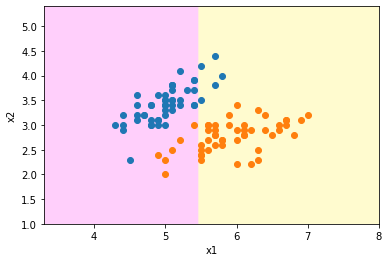

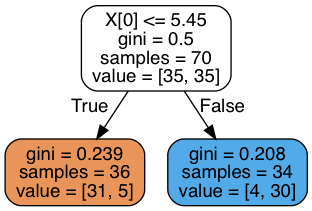

In [6]:
tree1 = train(DecisionTreeClassifier(max_depth=1), X, y)

plot_decision_boundary(tree1, X)
plot_data(X,y)
show_tree(tree1, X)

## max_depth = 2

[DecisionTreeClassifier] Train Accuracy: 0.971
[DecisionTreeClassifier] Valid Accuracy: 1.000


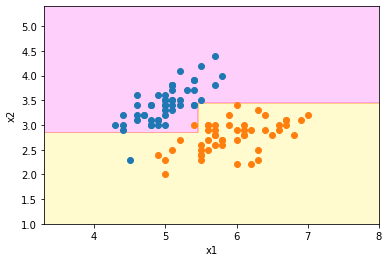

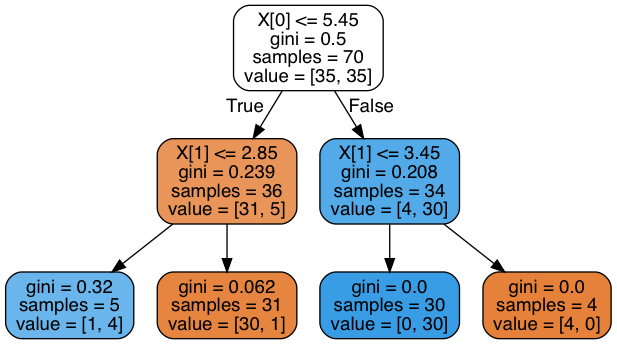

In [7]:
tree2 = train(DecisionTreeClassifier(max_depth=2), X, y)

plot_decision_boundary(tree2, X)
plot_data(X,y)
show_tree(tree2, X)

## max_depth = 3

[DecisionTreeClassifier] Train Accuracy: 0.986
[DecisionTreeClassifier] Valid Accuracy: 1.000


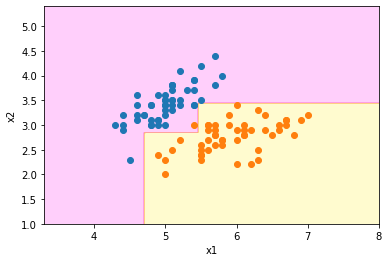

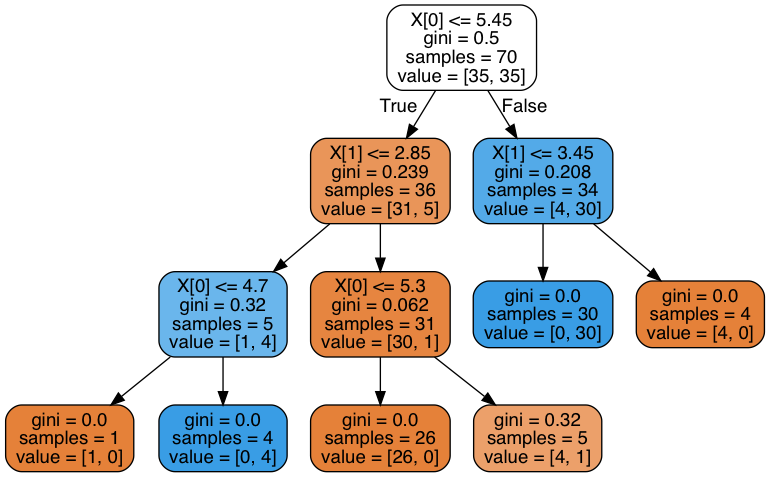

In [8]:
tree3 = train(DecisionTreeClassifier(max_depth=3), X, y)

plot_decision_boundary(tree3, X)
plot_data(X,y)
show_tree(tree3, X)

## max_depth = 4

[DecisionTreeClassifier] Train Accuracy: 1.000
[DecisionTreeClassifier] Valid Accuracy: 1.000


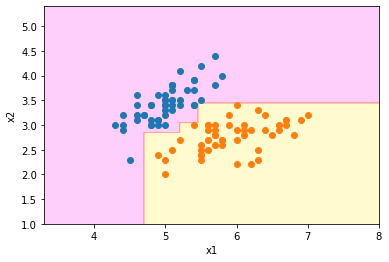

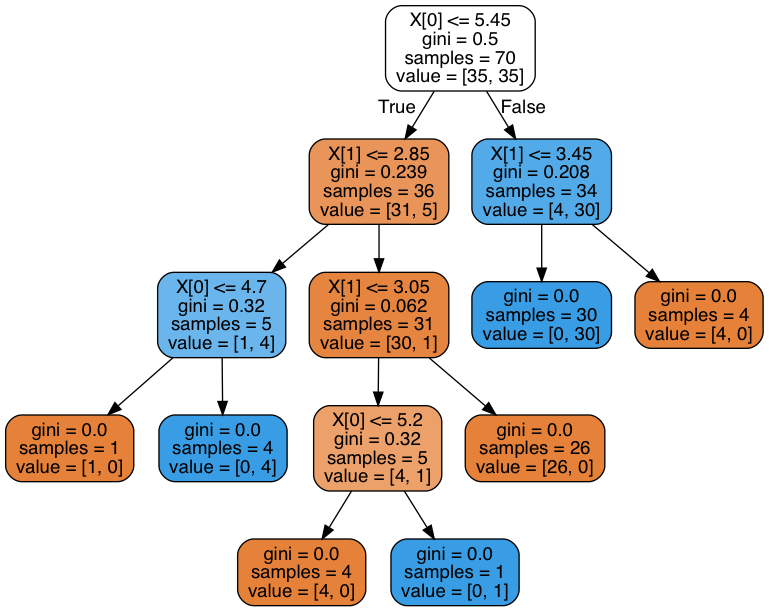

In [9]:
tree4 = train(DecisionTreeClassifier(max_depth=4), X, y)

plot_decision_boundary(tree4, X)
plot_data(X,y)
show_tree(tree4, X)

# dtreevizを使ってわかりやすく可視化する

## 注意！ JupyterNotebookだとSVGファイル表示にバグがある
- `matplotlib 3.1.1` で直るらしい
    - https://github.com/matplotlib/matplotlib/issues/14552
    - しかし、`matplotlib 3.1.1` だと、seabornの表示崩れが起きる

- https://github.com/parrt/dtreeviz より。
    - > Limitations. Jupyter notebook has a bug where they do not show .svg files correctly, but Juypter Lab has no problem.

- Colaboratoryでは問題がない



In [ ]:
# installが必要
# !pip install dtreeviz

In [10]:
# from dtreeviz.trees import dtreeviz

# viz = dtreeviz(
#     tree4,
#     X, 
#     y,
#     target_name='variety',
#     feature_names=iris.feature_names,
#     class_names=[str(i) for i in iris.target_names],
# ) 

# viz

おわり